In [34]:
import pandas as pd
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Aplicamos los mismos cambios que al dataser del modelo 1

In [35]:
data = pd.read_csv("./data/predict.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.54,Premium,E,VS2,61.3,59.0,5.26,5.21,3.21
1,1,0.32,Ideal,J,VS2,62.1,54.0,4.38,4.44,2.74
2,2,0.30,Good,H,VVS2,63.6,56.0,4.26,4.29,2.72
3,3,0.66,Very Good,F,SI1,59.2,58.0,5.69,5.72,3.38
4,4,0.42,Ideal,F,VS2,62.0,55.0,4.79,4.82,2.98


In [36]:
# Forma de nuestro dataset
data.shape

(13485, 10)

In [37]:
#Vemos que tipo de dato tenemos en cada una de nuestras columnas
data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [38]:
# Buscamos los valores nulos, y sorpresa, no hay!!

perc_null_col = data.isnull().sum().apply(lambda x: x/data.shape[0]).sort_values(ascending=False)
perc_null_col

id         0.0
carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [39]:
data_number = data.select_dtypes(include="number")
data_number

,id,carat,depth,table,x,y,z
0,0,0.54,61.3,59.0,5.26,5.21,3.21
1,1,0.32,62.1,54.0,4.38,4.44,2.74
2,2,0.30,63.6,56.0,4.26,4.29,2.72
3,3,0.66,59.2,58.0,5.69,5.72,3.38
4,4,0.42,62.0,55.0,4.79,4.82,2.98
...,...,...,...,...,...,...,...
13480,13480,1.07,62.5,59.0,6.50,6.47,4.05
13481,13481,0.50,62.2,58.0,5.14,5.08,3.18
13482,13482,1.14,61.7,60.0,6.74,6.67,4.14
13483,13483,0.70,59.4,62.0,5.77,5.82,3.44


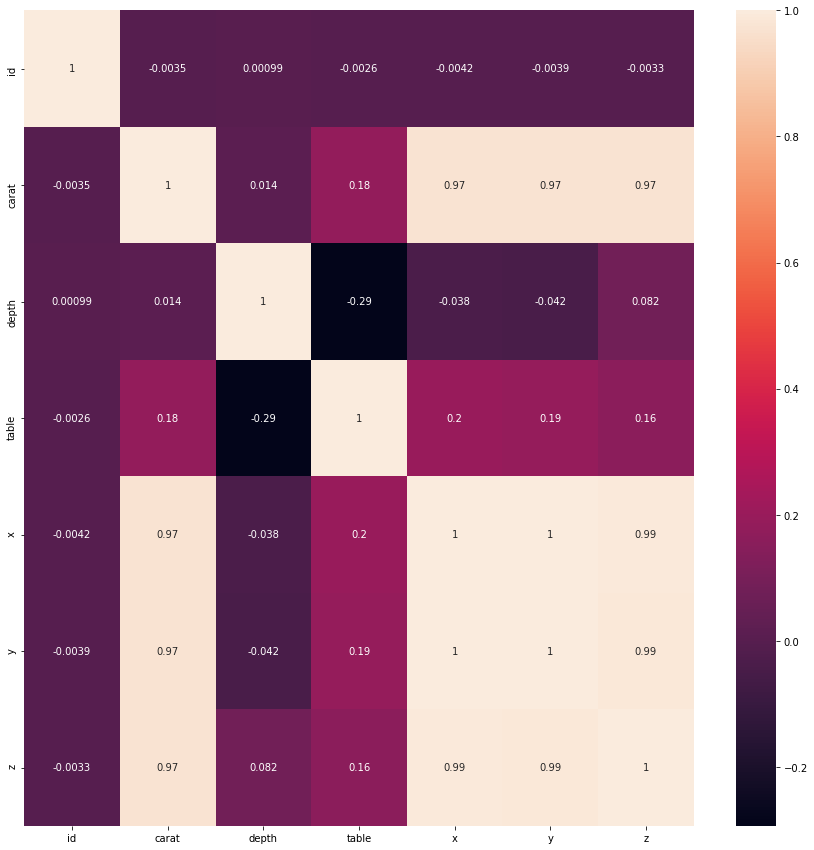

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(data_number.corr(), annot = True)
plt.show()

In [41]:
data["cut"].unique()

array(['Premium', 'Ideal', 'Good', 'Very Good', 'Fair'], dtype=object)

In [42]:
data["cut"].value_counts()

Ideal        5379
Premium      3546
Very Good    2918
Good         1246
Fair          396
Name: cut, dtype: int64

In [43]:
data["color"].unique()

array(['E', 'J', 'H', 'F', 'G', 'I', 'D'], dtype=object)

In [44]:
data["color"].value_counts()

G    2795
E    2457
F    2371
H    2089
D    1664
I    1410
J     699
Name: color, dtype: int64

In [45]:
data["clarity"].unique()

array(['VS2', 'VVS2', 'SI1', 'IF', 'VS1', 'SI2', 'VVS1', 'I1'],
      dtype=object)

In [46]:
le = preprocessing.LabelEncoder()

In [47]:
data["color_n"] = le.fit_transform(data["color"])
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,color_n
0,0,0.54,Premium,E,VS2,61.3,59.0,5.26,5.21,3.21,1
1,1,0.32,Ideal,J,VS2,62.1,54.0,4.38,4.44,2.74,6
2,2,0.30,Good,H,VVS2,63.6,56.0,4.26,4.29,2.72,4
3,3,0.66,Very Good,F,SI1,59.2,58.0,5.69,5.72,3.38,2
4,4,0.42,Ideal,F,VS2,62.0,55.0,4.79,4.82,2.98,2


In [48]:
data["clarity_n"] = le.fit_transform(data["clarity"])
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,color_n,clarity_n
0,0,0.54,Premium,E,VS2,61.3,59.0,5.26,5.21,3.21,1,5
1,1,0.32,Ideal,J,VS2,62.1,54.0,4.38,4.44,2.74,6,5
2,2,0.30,Good,H,VVS2,63.6,56.0,4.26,4.29,2.72,4,7
3,3,0.66,Very Good,F,SI1,59.2,58.0,5.69,5.72,3.38,2,2
4,4,0.42,Ideal,F,VS2,62.0,55.0,4.79,4.82,2.98,2,5


In [49]:
dic_para_cut = {"Ideal": 0,
                "Premium": 1,
                "Very Good": 2,
                "Good":3,
                "Fair":4
               }

In [50]:
data["cut_n"] = data["cut"].map(dic_para_cut)
data

,id,carat,cut,color,clarity,depth,table,x,y,z,color_n,clarity_n,cut_n
0,0,0.54,Premium,E,VS2,61.3,59.0,5.26,5.21,3.21,1,5,1
1,1,0.32,Ideal,J,VS2,62.1,54.0,4.38,4.44,2.74,6,5,0
2,2,0.30,Good,H,VVS2,63.6,56.0,4.26,4.29,2.72,4,7,3
3,3,0.66,Very Good,F,SI1,59.2,58.0,5.69,5.72,3.38,2,2,2
4,4,0.42,Ideal,F,VS2,62.0,55.0,4.79,4.82,2.98,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.07,Premium,G,SI2,62.5,59.0,6.50,6.47,4.05,3,3,1
13481,13481,0.50,Premium,D,SI2,62.2,58.0,5.14,5.08,3.18,0,3,1
13482,13482,1.14,Premium,H,VS2,61.7,60.0,6.74,6.67,4.14,4,5,1
13483,13483,0.70,Very Good,I,SI1,59.4,62.0,5.77,5.82,3.44,5,2,2


In [51]:
data.drop(["cut", "color", "clarity"], axis=1, inplace=True)
data.head()

,id,carat,depth,table,x,y,z,color_n,clarity_n,cut_n
0,0,0.54,61.3,59.0,5.26,5.21,3.21,1,5,1
1,1,0.32,62.1,54.0,4.38,4.44,2.74,6,5,0
2,2,0.30,63.6,56.0,4.26,4.29,2.72,4,7,3
3,3,0.66,59.2,58.0,5.69,5.72,3.38,2,2,2
4,4,0.42,62.0,55.0,4.79,4.82,2.98,2,5,0


In [52]:
data.dtypes

id             int64
carat        float64
depth        float64
table        float64
x            float64
y            float64
z            float64
color_n        int32
clarity_n      int32
cut_n          int64
dtype: object

In [1]:
#Aplicamos Normalización
min_max = MinMaxScaler()

NameError: name 'MinMaxScaler' is not defined

In [54]:
data["depth"] = min_max.fit_transform(data[["depth"]])
data["table"] = min_max.fit_transform(data[["table"]])
data["x"] = min_max.fit_transform(data[["x"]])
data["y"] = min_max.fit_transform(data[["y"]])
data["z"] = min_max.fit_transform(data[["z"]])
data["color"] = min_max.fit_transform(data[["color_n"]])
data["clarity"] = min_max.fit_transform(data[["clarity_n"]])
data["cut"] = min_max.fit_transform(data[["cut_n"]])

In [55]:
data.drop(["cut_n", "color_n", "clarity_n"], axis=1, inplace=True)
data.head()

,id,carat,depth,table,x,y,z,color,clarity,cut
0,0,0.54,0.378676,0.444444,0.489758,0.494307,0.459885,0.166667,0.714286,0.25
1,1,0.32,0.408088,0.305556,0.407821,0.421252,0.392550,1.000000,0.714286,0.00
2,2,0.30,0.463235,0.361111,0.396648,0.407021,0.389685,0.666667,1.000000,0.75
3,3,0.66,0.301471,0.416667,0.529795,0.542694,0.484241,0.333333,0.285714,0.50
4,4,0.42,0.404412,0.333333,0.445996,0.457306,0.426934,0.333333,0.714286,0.00


In [56]:
from sklearn.model_selection import train_test_split


In [57]:
X = data
X.head()

,id,carat,depth,table,x,y,z,color,clarity,cut
0,0,0.54,0.378676,0.444444,0.489758,0.494307,0.459885,0.166667,0.714286,0.25
1,1,0.32,0.408088,0.305556,0.407821,0.421252,0.392550,1.000000,0.714286,0.00
2,2,0.30,0.463235,0.361111,0.396648,0.407021,0.389685,0.666667,1.000000,0.75
3,3,0.66,0.301471,0.416667,0.529795,0.542694,0.484241,0.333333,0.285714,0.50
4,4,0.42,0.404412,0.333333,0.445996,0.457306,0.426934,0.333333,0.714286,0.00


In [58]:
import pickle

In [59]:
# Exportamos el nuevo modelo aplicado a nuestra predicción de datos.
load = pickle.load(open("./modelos/mi mejor modelo por ahora", "rb"))

In [60]:
price = load.predict(X)
price

array([ 9525.33446009,  6655.25754757, 10135.34171961, ...,
       13520.80827028,  8916.87368177,  9048.17914437])

In [61]:
#Incorporamos la variable y que hemos predicho
data["price"] = price

In [62]:
data.head()

,id,carat,depth,table,x,y,z,color,clarity,cut,price
0,0,0.54,0.378676,0.444444,0.489758,0.494307,0.459885,0.166667,0.714286,0.25,9525.334460
1,1,0.32,0.408088,0.305556,0.407821,0.421252,0.392550,1.000000,0.714286,0.00,6655.257548
2,2,0.30,0.463235,0.361111,0.396648,0.407021,0.389685,0.666667,1.000000,0.75,10135.341720
3,3,0.66,0.301471,0.416667,0.529795,0.542694,0.484241,0.333333,0.285714,0.50,8274.120580
4,4,0.42,0.404412,0.333333,0.445996,0.457306,0.426934,0.333333,0.714286,0.00,9118.138555


In [63]:
submit = data[["id","price"]]

In [64]:
submit.head()

,id,price
0,0,9525.334460
1,1,6655.257548
2,2,10135.341720
3,3,8274.120580
4,4,9118.138555


In [65]:
submit.to_csv("data/submit1.csv", index = False, header=True)